In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def dham(std, v, w, N):
    """Disturbed SSH Hamiltonian"""
    vv = v + std*randn(N)
    ww = w + std*randn(N)
    hops = reshape(array([list(vv),list(ww)]).T,2*N)
    H = roll(diag(hops),1,axis=1)
    H[-1,0]=0
    H += H.T.conj()
    return H

Text(0.5, 0, 'Standard Deviation')

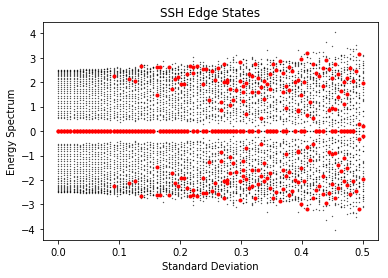

In [3]:
"""Calculates the energy spectrum for multiple
standard deviations and plots it coloring red
the edge states of the system."""

stdmin = 0
stdmax = 0.5
stdstep = 100
stdvals = linspace(stdmin, stdmax, stdstep)

energies = []
left_edge_region = 4
left_edge_energies = []
N, v, w = 30, 1., 1.5

for std in stdvals:
    #call disordered Hamiltonian
    H = dham(std, v, w, N)
    ee, vv = eigh(H)
    energies.append(ee)
    for jj in arange(2*N):
        if sum(abs(vv[:left_edge_region,jj])**2) > 0.33:
            left_edge_energies.append([std,ee[jj]])
            
for jj in arange(len(stdvals)):
    plot(2*N*[stdvals[jj]],energies[jj],"k.",ms=0.6)

lee = array(left_edge_energies)
plot(lee[:,0],lee[:,1],"r.")

title('SSH Edge States')
ylabel('Energy Spectrum')
xlabel('Standard Deviation')